## COMP41680 Assignment 1
## Student Number: 20200155
## Student Name: Kshitija Shelar

### API used- TMDB 
### Analyzed TMDB data for FRIENDS Tv show 


 [API link](*https*://developers.themoviedb.org/3/tv)

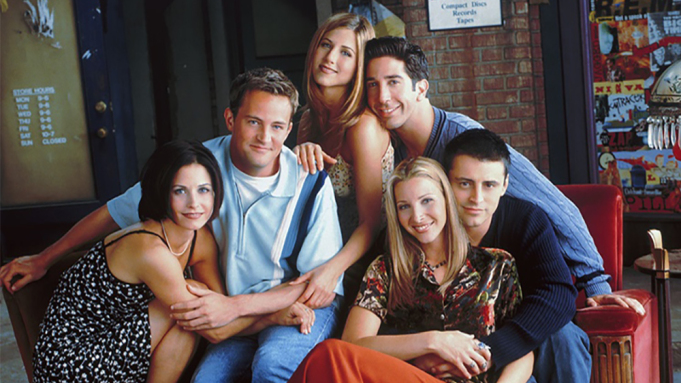

Steps to create api key and finding the right api url
1. Created account on tmdb and generated api key
2. Read the documentation of the api
3. To fetch the episodes of FRIENDS tv show, tv id of that show was required 
4. To find out the tv id, following api was executed
https://api.themoviedb.org/3/search/tv?api_key=19249ddd6092ba23f24b0c1115b62709&query=Friends  
5. In this, newly created apikey and query=friends was passed as input paramter
6. The id was displayed in the first row of the result. the id fetched is 1668. 
7. I will be using this id further in all other api calls. the api-key generated is '19249ddd6092ba23f24b0c1115b62709'

Importing libraries

In [73]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
from functools import reduce
import seaborn as sns
import urllib.request


URL links for all 10 seasons, for popularity of cast member and similar tv show data. For every season, the API is same it just needs season number as a parameter. 

In [74]:
urls=[]
for season in range(1,11):
  urls.append(
          {
              'url': 'https://api.themoviedb.org/3/tv/1668/season/{}?api_key=19249ddd6092ba23f24b0c1115b62709'.format(season),
              'key': 'url_s{}'.format(season)     #replace {} by season number 1-10
          } 
  )

urls.append({
    'url': 'https://api.themoviedb.org/3/tv/1668/similar?api_key=19249ddd6092ba23f24b0c1115b62709',
    'key': 'url_similar'
})

urls.append({
    'url': 'https://api.themoviedb.org/3/tv/1668/credits?api_key=19249ddd6092ba23f24b0c1115b62709',
    'key': 'url_popularity'
})



### Fetching data from urls and saving the json response.

In [75]:
collection = {}

for url in urls:
  response = requests.get(url['url'])   #get request call to the api
  collection[url['key']] = response.json()  #getting the json response in collection
#print(collection)

## Saving the JSON in data.json file. 

In [76]:
writeFile = open('data.json', 'w')      #writing the collected data in .json file
writeFile.write(json.dumps(collection))
writeFile.close()

## Reading the JSON file in datafile variable.

In [77]:
datafile = None
with open('data.json') as file:   
    datafile = json.load(file)      #loading the data from file



## Creating dataframes using this data for season wise analysis.

In [78]:
df1 = pd.DataFrame(datafile['url_s1']['episodes'])    #making dataframes for every season to process the data season wise

df2 = pd.DataFrame(datafile['url_s2']['episodes'])

df3 = pd.DataFrame(datafile['url_s3']['episodes'])

df4 = pd.DataFrame(datafile['url_s4']['episodes'])

df5 = pd.DataFrame(datafile['url_s5']['episodes'])

df6 = pd.DataFrame(datafile['url_s6']['episodes'])

df7 = pd.DataFrame(datafile['url_s7']['episodes'])

df8 = pd.DataFrame(datafile['url_s8']['episodes'])

df9 = pd.DataFrame(datafile['url_s9']['episodes'])

df10 = pd.DataFrame(datafile['url_s10']['episodes'])

df1.head(3)


,air_date,episode_number,crew,guest_stars,id,name,overview,production_code,season_number,still_path,vote_average,vote_count
0,1994-09-22,1,"[{'department': 'Writing', 'job': 'Writer', 'c...","[{'character': 'Paul', 'credit_id': '52570fd21...",85987,The Pilot,This is the one where it all began ... Rachel ...,456650,1,/fbtaoynlPpENx3Ss2laC7wgqLIP.jpg,6.8,59
1,1994-09-29,2,"[{'department': 'Writing', 'job': 'Writer', 'c...","[{'character': 'Carol Willick', 'credit_id': '...",86012,The One with the Sonogram at the End,"Carol, Ross's lesbian ex-wife, tells him at wo...",456652,1,/q00vWBNdLBIprqA3zQJ3TpfXNhu.jpg,7.4,30
2,1994-10-06,3,"[{'department': 'Directing', 'job': 'Director'...","[{'character': 'Lizzy', 'credit_id': '52570fd1...",85981,The One with the Thumb,Chandler's reunited with his beloved cigarette...,456651,1,/zLZb1o6dTpUmTNdODdbqH8dJpjc.jpg,8.5,31


### Graph plot of season 1 ratings per episode

Text(0, 0.5, 'Rating')

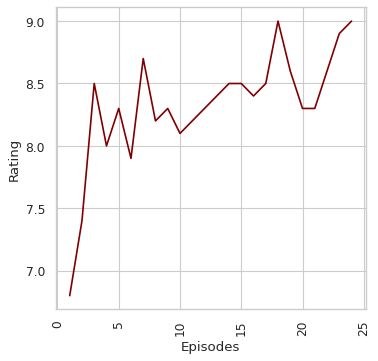

In [79]:
plt.figure(figsize=(5,5), dpi= 80)
plt.xticks(rotation = 90)
plt.plot(df1['episode_number'],df1['vote_average'],color = "maroon")
plt.xlabel('Episodes')
plt.ylabel('Rating')


#### Insight 1: 
#### we can see that the rating in the begining of the season was very less but eventually it started gradually incresing .

## Merging data of all 10 seasons together for a total analysis of the entire series

In [80]:
df_merged= df1.append([df2,df3,df4,df5,df6,df7,df8,df9,df10])
df_merged.head(1)

,air_date,episode_number,crew,guest_stars,id,name,overview,production_code,season_number,still_path,vote_average,vote_count
0,1994-09-22,1,"[{'department': 'Writing', 'job': 'Writer', 'c...","[{'character': 'Paul', 'credit_id': '52570fd21...",85987,The Pilot,This is the one where it all began ... Rachel ...,456650,1,/fbtaoynlPpENx3Ss2laC7wgqLIP.jpg,6.8,59


The list top rated episode from every season 

In [81]:
dfs =[df1,df2,df3,df4,df5,df6,df7,df8,df9,df10]
list_top = []
data = {
    'Season': [],
    'Name': [],
    'Rating': []
}
counter = 0
for df in dfs:
  counter += 1
  top = df.nlargest(1,['vote_average'])
  data['Season'].append(counter)
  data['Name'].append(top['name'].tolist()[0])
  data['Rating'].append(top['vote_average'].tolist()[0])

table_df = pd.DataFrame(data)
table_df.style


,Season,Name,Rating
0,1,The One with All the Poker,9.000000
1,2,The One with the Prom Video,9.400000
2,3,The One Where No One's Ready,8.900000
3,4,The One with the Embryos,9.300000
4,5,The One with All the Thanksgivings,9.300000
5,6,The One with Unagi,9.200000
6,7,The One with Chandler and Monica's Wedding (2),9.100000
7,8,The One with the Rumor,9.200000
8,9,The One in Barbados (2),9.000000
9,10,The Last One (1),9.600000


#### Insight 2:
#### Most highly rated episode from the entire series was from the last season 

Mean of the rating (vote_average) based on seasons

In [82]:
df_merged_mean = df_merged.groupby('season_number', as_index=False)['vote_average'].mean()
df_merged_mean

,season_number,vote_average
0,1,8.320833
1,2,8.641667
2,3,8.568000
3,4,8.754167
4,5,8.791667
5,6,8.700000
6,7,8.608333
7,8,8.716667
8,9,8.595833
9,10,8.827778


### Plotting average rating per seasons

Text(0, 0.5, 'Average of vote rating per season')

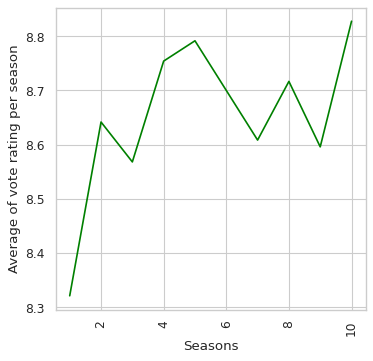

In [83]:
plt.figure(figsize=(5,5), dpi= 80)
plt.xticks(rotation = 90)
plt.plot(df_merged_mean['season_number'],df_merged_mean['vote_average'],color = "green",label = 'Average vote rating per season')
#plt.legend(loc='upper left')
plt.xlabel('Seasons')

plt.ylabel('Average of vote rating per season')

#### Insight 3:
#### We can see that the last season was the most highly  rated season from the entire series

List of top 10 most highly rated episodes from the entire series

In [84]:
top10 = df_merged.nlargest(10,['vote_average'])
print("Top 10 highly rated episodes in the entire series")
print(top10['name'])


Top 10 highly rated episodes in the entire series
16                      The Last One (1)
13           The One with the Prom Video
11              The One with the Embryos
7     The One with All the Thanksgivings
13     The One Where Everybody Finds Out
6           The One Where Ross Finds Out
8           The One with Ross's Sandwich
10      The One with All the Resolutions
16                    The One with Unagi
24         The One with the Proposal (2)
Name: name, dtype: object


#### Analyzing data of the crew members 

In [85]:
df_crew = pd.DataFrame(datafile['url_popularity']['crew'])

In [86]:

gender = df_crew['gender'].value_counts()
sex = []                # this will contain array where 0,1,2 is replaced by not specified, male or female
for item in df_crew['gender']:
  if item is 0:
    sex.append('Not specified')
  if item is 1:
    sex.append('Female')
  if item is 2:
    sex.append('Male')

df_crew['sex']=sex    # adding this column in the main data frame
df_crew.head(2)

,adult,gender,id,known_for_department,name,original_name,popularity,profile_path,credit_id,department,job,sex
0,False,0,1226543,Production,Wendy Knoller,Wendy Knoller,0.60,None,525710c119c295731c0328e3,Production,Producer,Not specified
1,False,0,1226546,Production,Todd Stevens,Todd Stevens,0.98,None,525710c319c295731c032933,Production,Producer,Not specified


In [87]:
countlist = [0,0,0]
for i in df_crew['sex']:
  if i == 'Male':
    countlist[0] +=1      # counting the appearance of the genders in the dataframe  
  elif i== 'Female':
    countlist[1] +=1
  else:
    countlist[2] +=1

Plotting proportion of males and females in the whole crew 

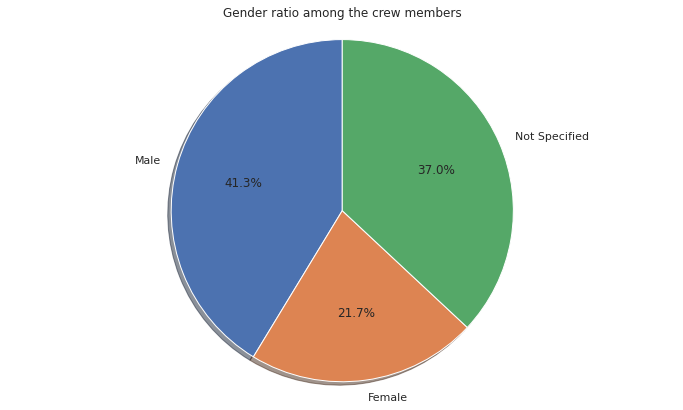

In [88]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Male','Female','Not Specified'
sizes = countlist
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Gender ratio among the crew members')

plt.show()

#### Insight 4:
#### We can see even after ignoring the not specified names, there were more number of male crew members than females in the whole crew of FRIENDS

### Finding out the number of crew members working in each department



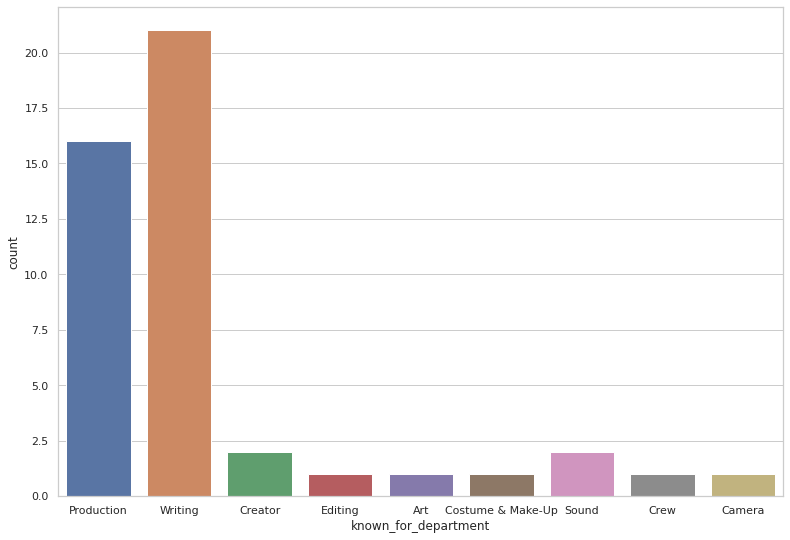

In [89]:
sns.set(rc={'figure.figsize':(13,9)})
sns.set_style('whitegrid')
sns.countplot(x='known_for_department',data=df_crew)

#### Insight 5:
#### We can see that maximum number of crew members were working in writing and production department.

### Finding out the proportion of males and females from the crew members working in each department

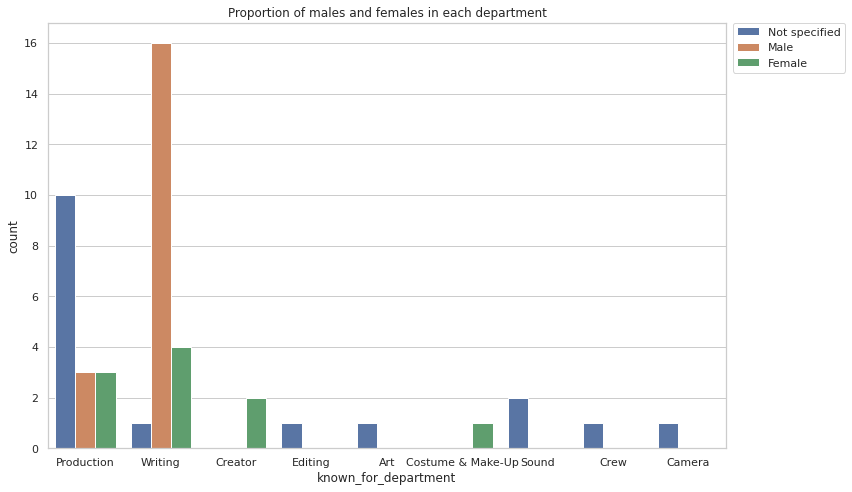

In [90]:
sns.set(rc={'figure.figsize':(12,7)})
sns.set_style('whitegrid')
sns.countplot(x='known_for_department',hue='sex',data=df_crew)
# place the legend outside the figure/plot
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("Proportion of males and females in each department")
plt.tight_layout()


In [91]:
countlist = [0,0,0]
dept = ["Production","Writing","Creator","Editing","Art","Costume & Make-Up","Sound","Crew","Camera"]
dept_counts = {}

dept_df = df_crew['known_for_department']
sex_df = df_crew['sex']

for i in range(0, len(dept_df)):
  dept_name = dept_df[i]
  sex = sex_df[i]

  if dept_name not in dept_counts:
    dept_counts[dept_name] = [0,0,0]

  if sex == 'Male':
    dept_counts[dept_name][0] += 1
  elif sex == 'Female':
    dept_counts[dept_name][1] += 1
  else:
    dept_counts[dept_name][2] += 1

print(dept_counts)

{'Production': [3, 3, 10], 'Writing': [16, 4, 1], 'Creator': [0, 2, 0], 'Editing': [0, 0, 1], 'Art': [0, 0, 1], 'Costume & Make-Up': [0, 1, 0], 'Sound': [0, 0, 2], 'Crew': [0, 0, 1], 'Camera': [0, 0, 1]}


#### Insight 6:
#### In the writing department there are the most number of males 

### Finding the most popular actor from the 6 main characters

Plotting the popularity of the cast members from the most popular to the least

In [92]:
df_pop = pd.DataFrame(datafile['url_popularity']['cast'])
df_pop= df_pop.sort_values(by=["popularity"],ascending=False)
df_pop.head(2)

,adult,gender,id,known_for_department,name,original_name,popularity,profile_path,character,credit_id,order
4,False,1,4491,Acting,Jennifer Aniston,Jennifer Aniston,14.399,/qPXG41rYdUGldZhMhuZFvmpZKRp.jpg,Rachel Green,525710bd19c295731c03242d,4
2,False,1,14405,Acting,Courteney Cox,Courteney Cox,8.977,/crsEIfA8JPuZNl5EIRvE14uSiMo.jpg,Monica Geller,525710bc19c295731c032341,2


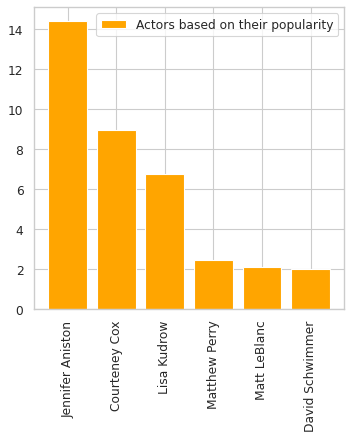

In [93]:
plt.figure(figsize=(5,5), dpi= 80)
plt.xticks(rotation = 90)
plt.bar(df_pop['name'],df_pop['popularity'],color = "orange",label = 'Actors based on their popularity')
plt.legend(loc='upper right')

#### Insight 7: Jennifer Aniston was the most popular actor among the other cast members

Plotting the number of appearances of Guest stars in the series.

<BarContainer object of 8 artists>

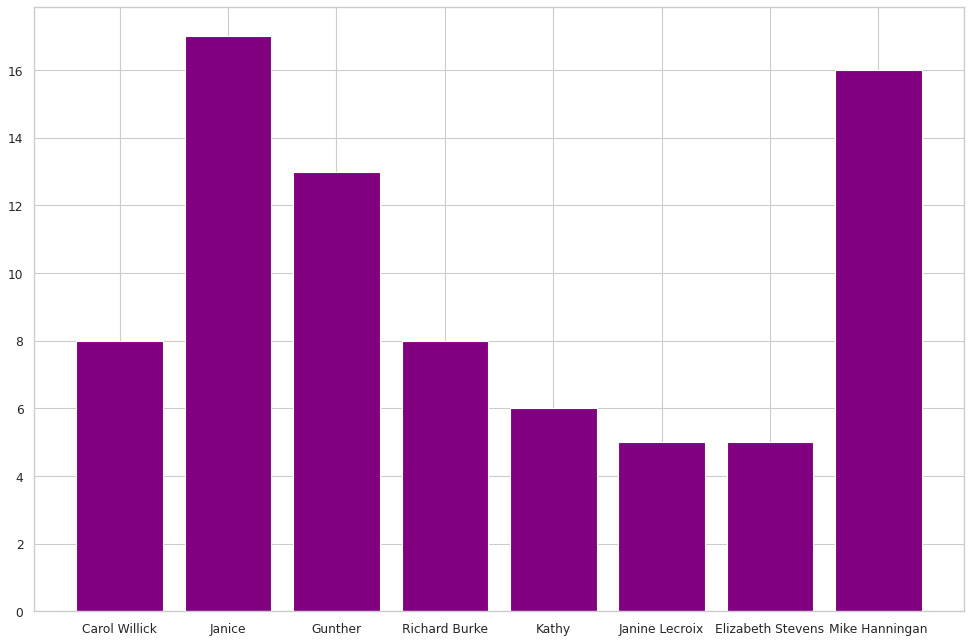

In [94]:
guest = df_merged['guest_stars']    #fetching the list of guest stars along with other information
guest_count = {}                    # making a dictionary with guest name and the count of their appearance
for g in guest:
  if len(g) > 0:
    character = g[0]['character']
    if character not in guest_count:
      guest_count[character] = 0

    guest_count[character] += 1

guests = []
counts = []
for key in guest_count.keys():
  count = guest_count[key]
  if count >= 5:
    guests.append(key)        # taking onlt the guests which have appeared more than 5 times in the show as there were many guest appearances
    counts.append(count)
plt.figure(figsize=(15,10), dpi= 80)

plt.bar(guests, counts, color = "purple", label = 'Guest Count')

#### Insight 8: 
#### Janice appeared the most number of times other than the 6 main characters on the show.

Finding out 20 similar TV shows wrt FRIENDS based on their popularity

In [95]:
df = pd.DataFrame(datafile['url_similar']['results'])


In [96]:
df= df.sort_values(by=["popularity"],ascending=False)

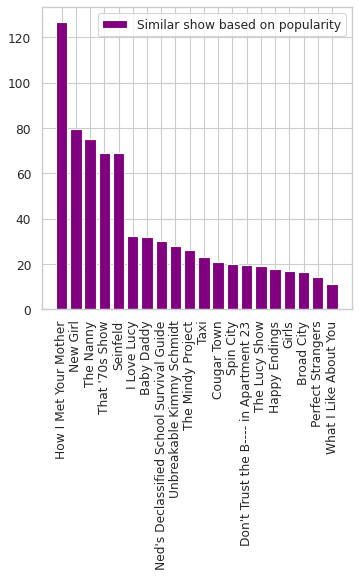

In [97]:
plt.figure(figsize=(5,5), dpi= 80)
plt.xticks(rotation = 90)
plt.bar(df['name'],df['popularity'],color = "purple",label = 'Similar show based on popularity')
plt.legend(loc='upper right')

In [98]:
df['name']

0                        How I Met Your Mother
3                                     New Girl
13                                   The Nanny
5                               That '70s Show
19                                    Seinfeld
4                                  I Love Lucy
6                                   Baby Daddy
16    Ned's Declassified School Survival Guide
10                   Unbreakable Kimmy Schmidt
12                           The Mindy Project
15                                        Taxi
9                                  Cougar Town
11                                   Spin City
7        Don't Trust the B---- in Apartment 23
18                               The Lucy Show
8                                Happy Endings
14                                       Girls
17                                  Broad City
1                            Perfect Strangers
2                        What I Like About You
Name: name, dtype: object

In [99]:
df= df.sort_values(by=["vote_average"],ascending=False)


20 similar shoes wrt to rating

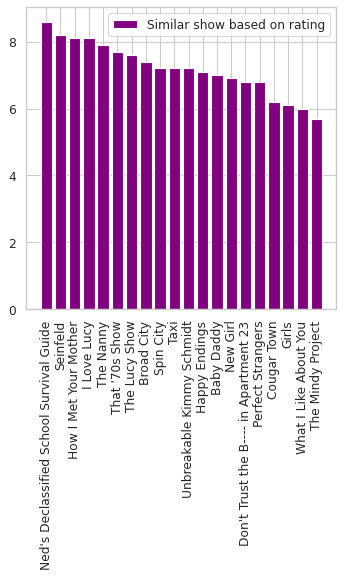

In [100]:
plt.figure(figsize=(5,5), dpi= 80)
plt.xticks(rotation = 90)
plt.bar(df['name'],df['vote_average'],color = "purple",label = 'Similar show based on rating')
plt.legend(loc='upper right')

#### Insight 9: 
#### Based on popularity, How I met you mother is the most similar show wrt FRIENDS. 

### Summary of all the insights gained after analysis of this data set :

#### 1. The rating in the begining of the season was very less but eventually it started gradually incresing.
#### 2. The most highly rated episode from the entire series was from the last season. 
#### 3. The last season was the most highly  rated season from the entire series.
#### 4. Even after ignoring the not specified gender, there were more number of male crew members than females in the whole crew of FRIENDS.
#### 5. Maximum number of crew members were working in writing and production department.
#### 6.  In the writing department there are the most number of males.
#### 7. Jennifer Aniston was the most popular actor among the other cast members.
#### 8. The character Janice appeared the most number of times other than the 6 main characters on the show.
#### 9. Based on popularity, How I met you mother is the most similar show wrt FRIENDS.